# Testing Yolov11 Instance Segmentation
![](https://drive.google.com/uc?id=1ITSbFak6QkD4z0kAMXdSpNrrn0pKuBqr)

## Dataset path

https://universe.roboflow.com/university-bswxt/crack-bphdr

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 39.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.5.82
  Attempting uninstall: nvidia-curand-cu12
    Found existing installation: nvidia-curand-cu12 10.3.6.82
    Uninstalling nvidia-curand-cu12-10.3.6.82:
      Successfully uninstalled nvidia-curand-cu12-10.3.6.82
  Attempting uninstall: nvidia-cufft-cu12
    Found existing installation: nvidia-cufft-cu12 11.2.3.61
    Uninstalling nvidia-cufft-cu12-11.2.3.61:
      Successfully uninstalled nvidia-cufft-cu12-11.2.3.61
  Attempting uninstall: nvidia-cuda-runtime-cu12
    Found existing installation: nvidia-cuda-runtime-cu12 12.5.82
    Unin

In [2]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [3]:
import os
import cv2

## Model inference

https://docs.ultralytics.com/tasks/segment/#predict

In [4]:
!unzip "/content/Yolov11-test-1.zip"

Archive:  /content/Yolov11-test-1.zip
  inflating: train/BoxPR_curve.png   
  inflating: train/MaskPR_curve.png  
  inflating: train/MaskR_curve.png   
  inflating: train/MaskP_curve.png   
  inflating: train/labels.jpg        
  inflating: train/train_batch1.jpg  
  inflating: train/BoxR_curve.png    
  inflating: train/MaskF1_curve.png  
  inflating: train/train_batch23252.jpg  
  inflating: train/labels_correlogram.jpg  
  inflating: train/args.yaml         
  inflating: train/events.out.tfevents.1742151998.2f99046f9280.172.1  
  inflating: train/val_batch2_labels.jpg  
  inflating: train/results.csv       
  inflating: train/val_batch1_pred.jpg  
  inflating: train/train_batch23251.jpg  
  inflating: train/train_batch23250.jpg  
  inflating: train/train_batch2.jpg  
  inflating: train/BoxF1_curve.png   
  inflating: train/train_batch0.jpg  
  inflating: train/BoxP_curve.png    
  inflating: train/confusion_matrix.png  
  inflating: train/val_batch0_labels.jpg  
  inflating: train/v

In [5]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
model = YOLO("path/to/best.pt")

## Below is a list of model available for training

- yolo11n-seg.pt
- yolo11s-seg.pt
- yolo11m-seg.pt
- yolo11l-seg.pt
- yolo11x-seg.pt

URL for reference :
https://docs.ultralytics.com/models/yolo11/#supported-tasks-and-modes

In [6]:
model = YOLO("/content/train/weights/best.pt")  # load a pretrained model (recommended for training)

## Inference on Image

In [7]:
file_name = "/content/stone-texture.jpg"
results = model(file_name)  # predict on an image

# Process results list
for result in results:
    result.show()  # display to screen
    file_name, ext = os.path.splitext(file_name)
    result.save(filename=f"{file_name}_output.jpg")  # save to disk

Output hidden; open in https://colab.research.google.com to view.

## Inference on Batch of Images

In [8]:
file_name_1 = "/content/stone-texture.jpg"
file_name_2 = "/content/stone-texture-2.jpg"
batch = [file_name_1, file_name_2]
# Run batched inference on a list of images
results = model(batch)  # predict on an image

# Process results list
for idx, result in enumerate(results):
    print(idx)
    result.show()  # display to screen
    file_name, ext = os.path.splitext(batch[idx])
    result.save(filename=f"{file_name}_output_{idx}.jpg")  # save to disk

Output hidden; open in https://colab.research.google.com to view.

# Inference on np.ndarray

In [9]:
import cv2

In [10]:
file_name = "/content/stone-texture.jpg"
image_array = cv2.imread(file_name)
print(type(image_array))

<class 'numpy.ndarray'>


In [11]:
results = model(image_array)  # predict on an ndarray

# Process results list
for result in results:
    result.show()  # display to screen
    file_name, ext = os.path.splitext(file_name)
    result.save(filename=f"{file_name}_output.jpg")  # save to disk

Output hidden; open in https://colab.research.google.com to view.

## Extract Masks like semantic segmentation

In [12]:
import torch

In [13]:
import matplotlib.pyplot as plt


0: 608x640 1 crack, 11.6ms
Speed: 4.6ms preprocess, 11.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 640)


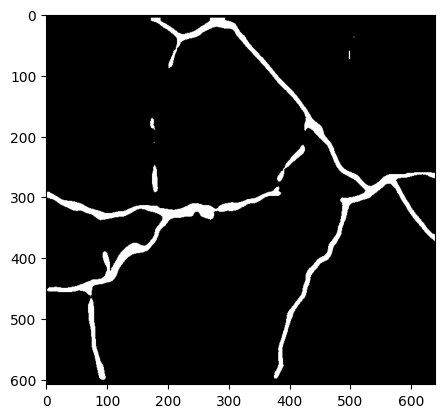

In [15]:
results = model(image_array)  # predict on an ndarray

# Process results list
for result in results:
    if result.masks:
      # get array results
      masks = result.masks.data
      boxes = result.boxes.data

      # extract classes
      # [x, y, x, y , cls]
      clss = boxes[:, 5]

      # get indices of results where class is 0 (crack in custom dataset)
      object_indices = torch.where(clss == 0)

      # use these indices to extract the relevant masks
      crack_masks = masks[object_indices]

      if len(crack_masks) == 0:
        print("No mask found")

      # scale for visualizing results
      mask = torch.any(crack_masks, dim=0).to(torch.uint8) * 255
      mask = mask.cpu().numpy()
      plt.imshow(mask, cmap='grey')